In [1]:
 from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/customer_risk

/gdrive/MyDrive/customer_risk


In [4]:
ls

customer_data.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [7]:
df_train=pd.read_csv('customer_data.csv')
df_train.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [9]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1125.000000,1125.000000,976.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,57836771.382222,5.482667,1283.911373,2.333333,120883.555556,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1817150.376768,1.383338,51.764022,0.878773,88445.228773,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,54982353.000000,1.000000,1116.500000,1.000000,15000.000000,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,54990497.000000,4.000000,1244.000000,1.000000,72000.000000,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,58989748.000000,5.000000,1281.500000,3.000000,102000.000000,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,58997994.000000,7.000000,1314.500000,3.000000,139000.000000,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,59006239.000000,7.000000,1481.000000,3.000000,1200000.000000,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


# EDA

In [10]:
df_train.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [14]:
df_train['fea_2'].fillna(value =df_train['fea_2'].mean() , inplace = True)

In [15]:
df_train.columns

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11'],
      dtype='object')

In [16]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [17]:
binary_cols

['label', 'fea_5']

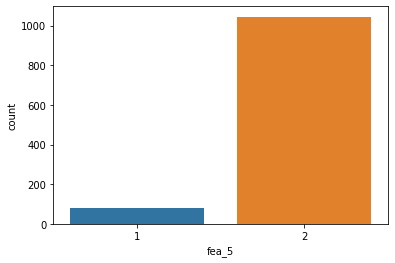

In [18]:
sns.countplot("fea_5", data=df_train)

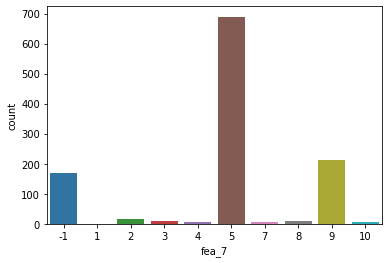

In [19]:
sns.countplot("fea_7", data=df_train) 

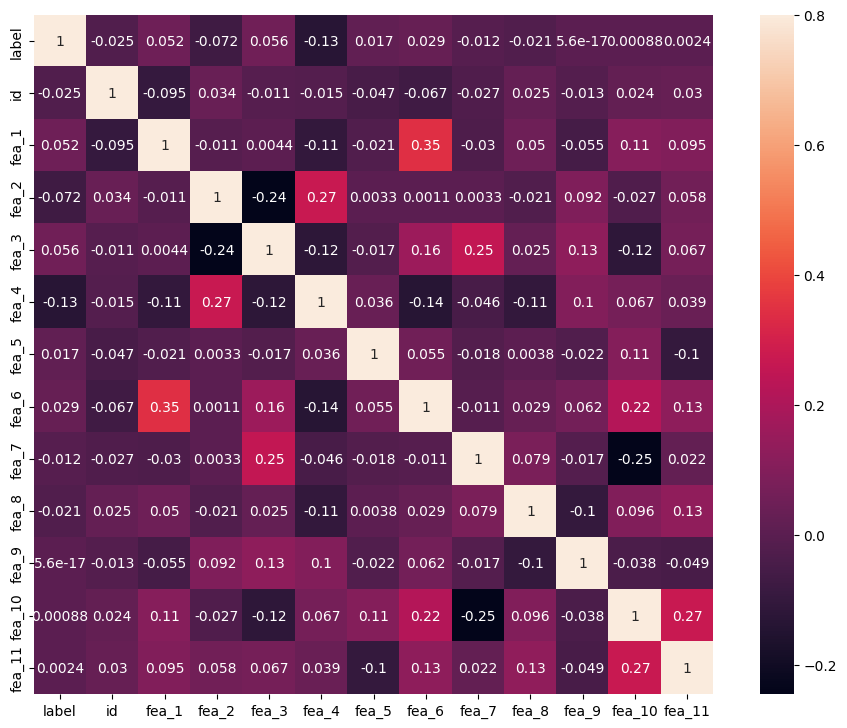

In [20]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

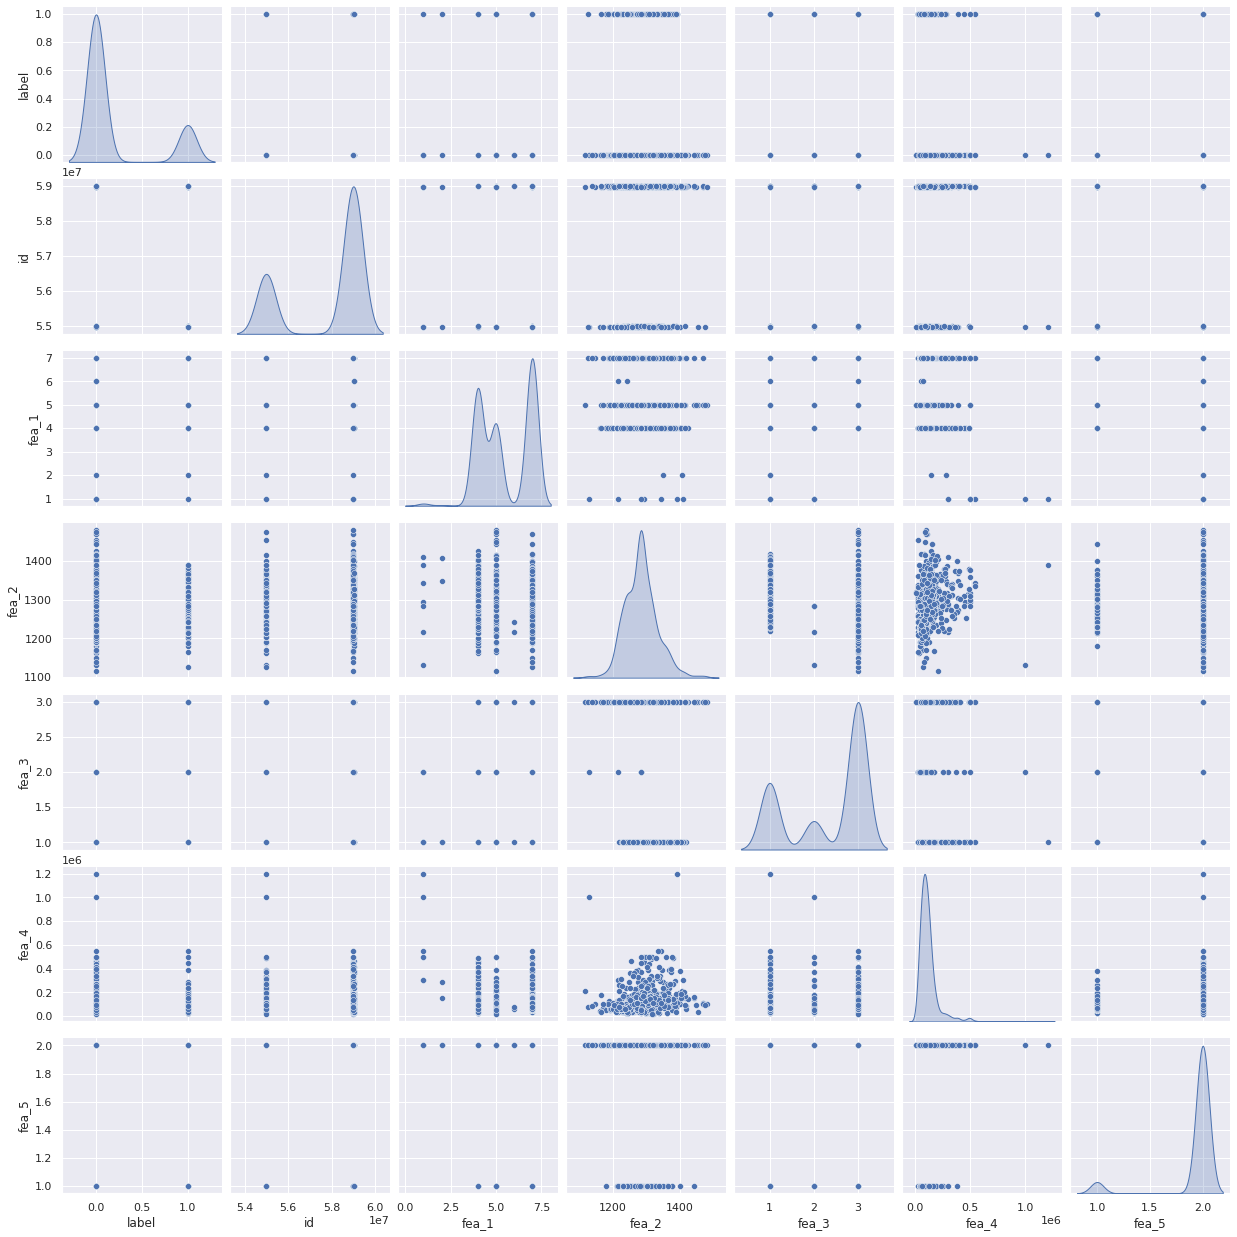

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [22]:
X = df_train.drop(['label'], axis = 1)
Y = df_train["label"]
x_Data = X.values
y_Data = Y.values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [27]:
model.score(X_test,y_test)

0.7644444444444445

In [28]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.81111111 0.81111111 0.81111111 0.80555556 0.80555556]


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.8088888888888889

In [31]:
confusion_matrix(y_train, pred)

array([[728,   0],
       [172,   0]])

In [32]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [33]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [34]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       172
           1       0.00      0.00      0.00        53

    accuracy                           0.76       225
   macro avg       0.38      0.50      0.43       225
weighted avg       0.58      0.76      0.66       225



In [35]:
cma = confusion_matrix(y_test, predicted_test)

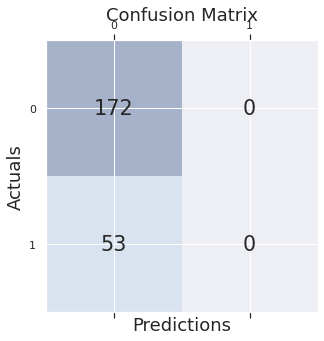

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier as rf

In [38]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [39]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.93

In [40]:
confusion_matrix(y_train, pred)

array([[728,   0],
       [ 63, 109]])

In [41]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [42]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [43]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.00      0.00      0.00        53

    accuracy                           0.74       225
   macro avg       0.38      0.49      0.43       225
weighted avg       0.58      0.74      0.65       225



In [44]:
cma = confusion_matrix(y_test, pred_test)

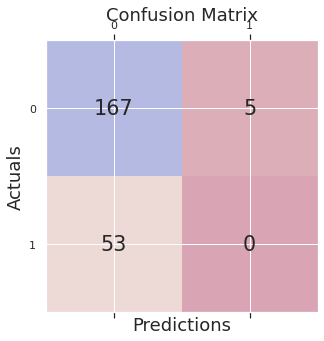

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [46]:
from sklearn import tree

In [47]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [48]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [49]:
confusion_matrix(y_train, pred1)

array([[728,   0],
       [  0, 172]])

In [50]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [51]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       172
           1       0.31      0.26      0.29        53

    accuracy                           0.69       225
   macro avg       0.55      0.54      0.54       225
weighted avg       0.67      0.69      0.68       225



In [52]:
cma = confusion_matrix(y_test, pred1_test)

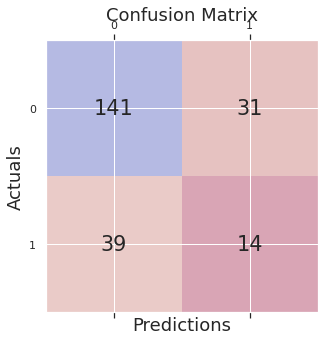

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [55]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.8088888888888889

In [56]:
confusion_matrix(y_train, pred_LR)

array([[728,   0],
       [172,   0]])

In [57]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [58]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       172
           1       0.00      0.00      0.00        53

    accuracy                           0.76       225
   macro avg       0.38      0.50      0.43       225
weighted avg       0.58      0.76      0.66       225



In [59]:
cma = confusion_matrix(y_test, pred_LR_test)

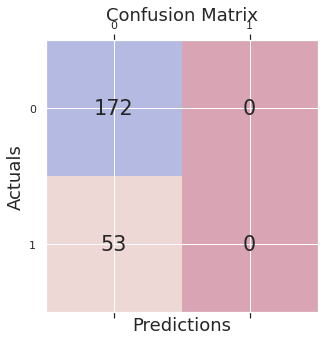

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [63]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.19111111111111112

In [64]:
confusion_matrix(y_train, pred_NN)

array([[  0, 728],
       [  0, 172]])

In [65]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [66]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.24      1.00      0.38        53

    accuracy                           0.24       225
   macro avg       0.12      0.50      0.19       225
weighted avg       0.06      0.24      0.09       225



In [67]:
cma = confusion_matrix(y_test, pred_NN_test)

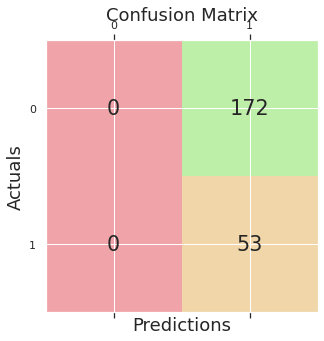

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [69]:
import xgboost as xgb

In [70]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [71]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.8388888888888889

In [72]:
confusion_matrix(y_train, pred_XGB)

array([[725,   3],
       [142,  30]])

In [73]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [74]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       172
           1       0.50      0.06      0.10        53

    accuracy                           0.76       225
   macro avg       0.64      0.52      0.48       225
weighted avg       0.71      0.76      0.68       225



In [75]:
cma = confusion_matrix(y_test, pred_XGB_test)

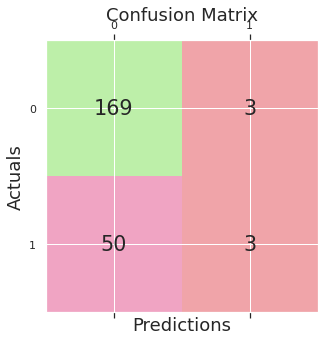

In [76]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

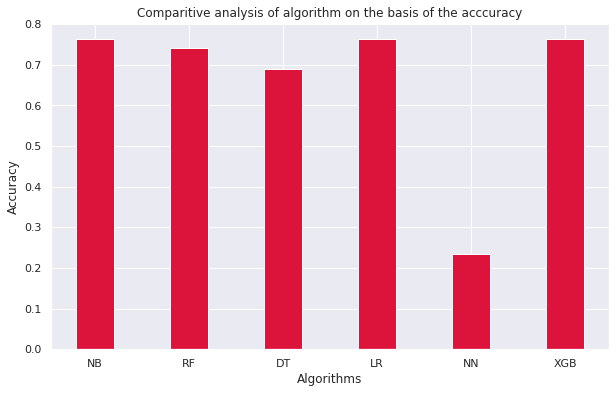

In [77]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


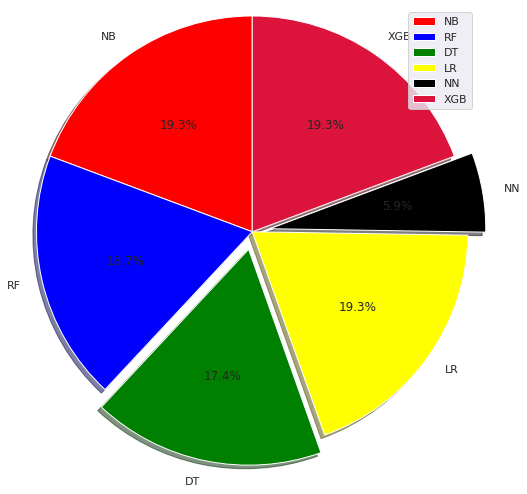

In [78]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [79]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']